In [2]:
import numpy as np 
import pandas as pd
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


In [3]:
# load mnist dataset from datasets
mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
# split dataset into features and target
X, y = mnist.data, mnist.target 

In [5]:
# contains 70000 images (where each image is 28 x 28 pixels and has 784 features - each pixel is a feature)
X.shape

(70000, 784)

In [6]:
# contains the target variable i.e what number each handwritten image is. 
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

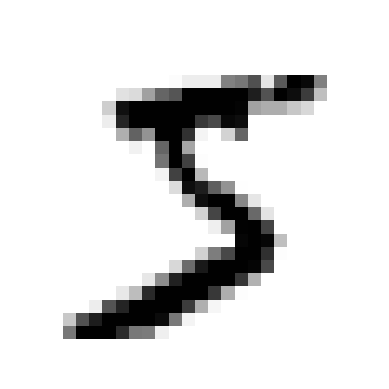

In [7]:
# view image 
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [8]:
y[0]

'5'

In [9]:
# since MNIST dataset from fetch_openml() is already split into training and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
# assigns true to target variables equal to '5' and false to those not. 
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [11]:
# training a binary classifier - stochastic gradient descent
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

### Evaluating Classifiers

In [13]:
# Confusion Matrix
# to compute the confusion matrix, you need to have a set of predictions so that they can be comapred to the actual target (use cross_val_predict() to avoid using test set)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
cm = confusion_matrix(y_train_5, y_train_pred)

# top left (53892 - true negatives)
# bottom right (3530 - true positives)
# top right (687 - false positives - type 1 errors)
# bottom left (1891 - false negatives)

cm

array([[53892,   687],
       [ 1891,  3530]])

In [14]:
# precision - TP / (TP + FP)
from sklearn.metrics import precision_score 
precision_score(y_train_5, y_train_pred) # only correct 83.7% of the time

0.8370879772350012

In [15]:
# recall - TP / (TP + FN)
from sklearn.metrics import recall_score
recall_score(y_train_5, y_train_pred) # only detects 65.1% of the time. 

0.6511713705958311

In [16]:
# f1 score - harmonic mean of precision and recall 
# f1 = 2 / (1/precision + 1/recall)
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [17]:
# SGDClassifier computes a score based on decision function to classify 
# if the score > threshold -> positive class 
# SGD threshold cannot be set but decision scores can be obtained. 
# example
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

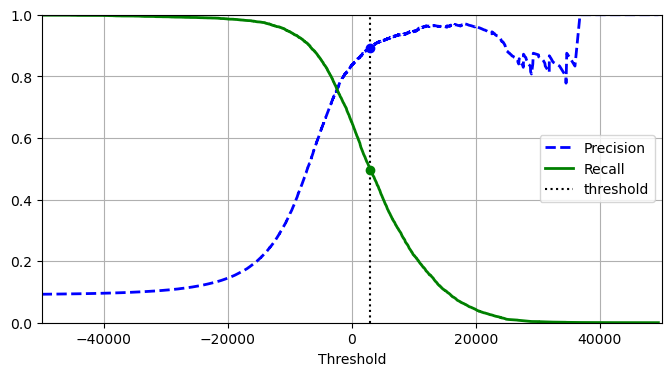

In [22]:
## since thresholds can affect the precision / recall, you can decide which treshold to use using cross_val_predict - which is a function that gets the scores of all instances in the training set
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

## with the scores above, you can use teh precision_recall_curve to compute predicion and recall for all possible thresholds. 
from sklearn.metrics import precision_recall_curve 

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
threshold = 3000
## then use matplotlib to plot the precision and recall as functions of the threshold value. 
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
# save_fig("precision_recall_vs_threshold_plot")

plt.show()